In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df["tenure"] = df["tenure"].astype(float)
df["Churn"] = df["Churn"] == "Yes"

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


In [12]:
T = df["tenure"]
E = df["Churn"]

In [13]:
kme = KaplanMeierFitter()

In [14]:
kme.fit(T, E, label="Estimate for Average Customer")

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

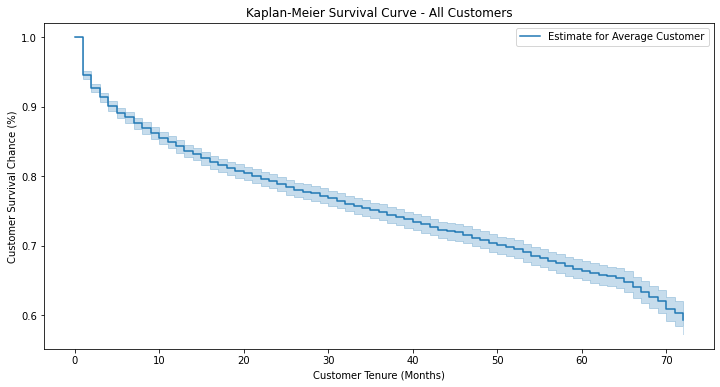

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
kme.plot(ax=ax)
ax.set_title("Kaplan-Meier Survival Curve - All Customers")
ax.set_xlabel("Customer Tenure (Months)")
ax.set_ylabel("Customer Survival Chance (%)")
plt.show()

In [19]:
features_to_drop = [
    "customerID",
    "gender",
    "PhoneService",
    "InternetService"
]

df2 = df.drop(features_to_drop, axis=1).copy()
df2["TotalCharges"] = pd.to_numeric(df2["TotalCharges"], errors="coerce")
df2["TotalCharges"].fillna(0, inplace=True)

In [20]:
binary_features = [
    "Partner",
    "Dependents",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling"
]

for feature in binary_features:
    df2[feature] = df2[feature] == "Yes"

In [21]:
ohe_features = [
    "MultipleLines",
    "Contract",
    "PaymentMethod"
]

df2 = pd.get_dummies(
    df2,
    drop_first=True,
    columns=ohe_features
)

In [22]:
def plot_categorical_survival(feature, T="tenure", E="Churn", data=df, ax=None):
    for cat in data[feature].unique():
        idx = data[feature] == cat
        kme = KaplanMeierFitter()
        kme.fit(data[idx][T], data[idx][E], label=cat)
        kme.plot(ax=ax, label=cat)

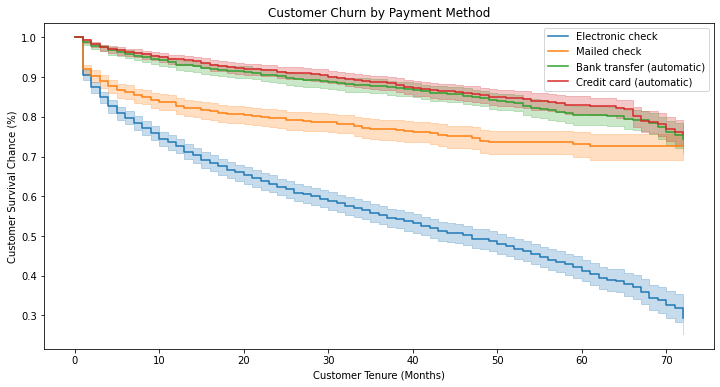

In [23]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,6))
plot_categorical_survival(feature="PaymentMethod", ax=ax_pmt)
ax_pmt.set_title("Customer Churn by Payment Method")
ax_pmt.set_xlabel("Customer Tenure (Months)")
ax_pmt.set_ylabel("Customer Survival Chance (%)")
plt.show()

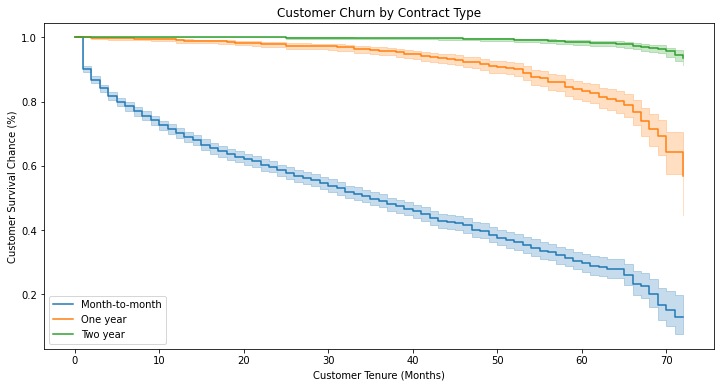

In [24]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,6))
plot_categorical_survival(feature="Contract", ax=ax_pmt)
ax_pmt.set_title("Customer Churn by Contract Type")
ax_pmt.set_xlabel("Customer Tenure (Months)")
ax_pmt.set_ylabel("Customer Survival Chance (%)")
plt.show()

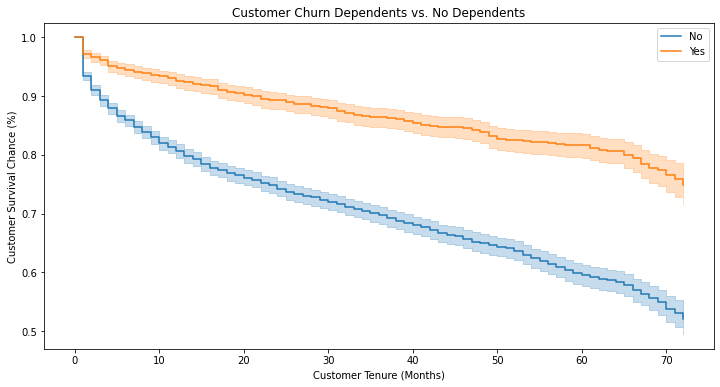

In [25]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,6))
plot_categorical_survival(feature="Dependents", ax=ax_pmt)
ax_pmt.set_title("Customer Churn Dependents vs. No Dependents")
ax_pmt.set_xlabel("Customer Tenure (Months)")
ax_pmt.set_ylabel("Customer Survival Chance (%)")
plt.show()